<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h1 style="color: #317773;"><b>DISASTER TWEETS CLASSIFICATION</b></h1>

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h3 style="color: #317773;"><b>Project outline:</b></h3>
    
    
* Data Overview  
* Importing Libraries
* Loading Data
* EDA
* Data Preprocessing
* Models Architecture and Training
* Models Evaluation
* Tuning parameters for LSTM and GRU and analyzing results
* Conclusion
* References

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h2 style="color: #317773;"><b>Data Overview</b></h2>


The Disaster Tweets Classification dataset is a widely used dataset in natural language processing (NLP) and machine learning for text classification tasks. This dataset is designed for the purpose of classifying tweets into two categories: those related to real disasters and those that are not. It's particularly useful for tasks such as sentiment analysis, disaster detection, and social media monitoring.

Here are some key characteristics of the Disaster Tweets Classification dataset:

The dataset comprises two main files: "train.csv" and "test.csv." In "train.csv," we find a total of 5 columns: "id," "keyword," "location," "text," and "target." Meanwhile, "test.csv" contains 4 columns: "id," "keyword," "location," and "text." train.csv consist of 7,613 rows, with the "id" column being well-balanced and containing no null values nad test.csv consist of 3,263 rows.

In "train.csv," it's evident that there's an imbalance in the distribution of the target variable. Specifically, there are 4,342 instances of non-disaster tweets (target = 0) and 3,271 instances of disaster-related tweets (target = 1). This class imbalance should be taken into account during the modeling and evaluation phases.

Overall, the dataset presents a valuable opportunity for text classification tasks, including the detection of real disasters in tweets. 

The primary goal of this project is to determine which machine learning or deep learning model, among LSTM (Long Short-Term Memory), GRU (Gated Recurrent Unit), SVM (Support Vector Machine), Random Forest Classifier, and XGBoost Classifier, performs best for the task of classifying tweets into two categories: real disasters and non-disasters.We will use accuracy score to find the best fit. 


<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h2 style="color: #317773;"><b>Importing Libraries</b></h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
import warnings
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import spacy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h2 style="color: #317773;"><b>Loading Data</b></h2>

In [17]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
submission = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h2 style="color: #317773;"><b>EDA</b></h2>

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


**Let's visualize our data:**

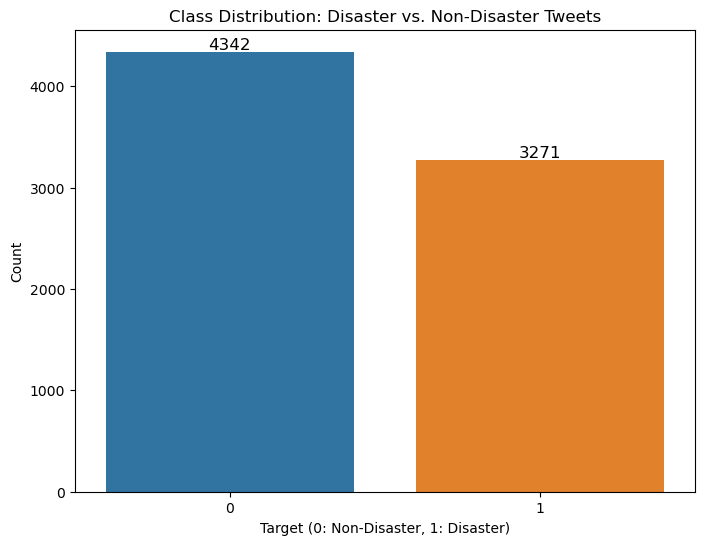

In [8]:
# Create a count plot to visualize the class distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train, x='target')
plt.title('Class Distribution: Disaster vs. Non-Disaster Tweets')
plt.xlabel('Target (0: Non-Disaster, 1: Disaster)')
plt.ylabel('Count')

# Annotate the bars with exact numbers
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

We can see from the plot that there are 4,342 instances of non-disaster tweets (target = 0) and 3,271 instances of disaster-related tweets (target = 1). This class imbalance should be taken into account during the modeling and evaluation phases.

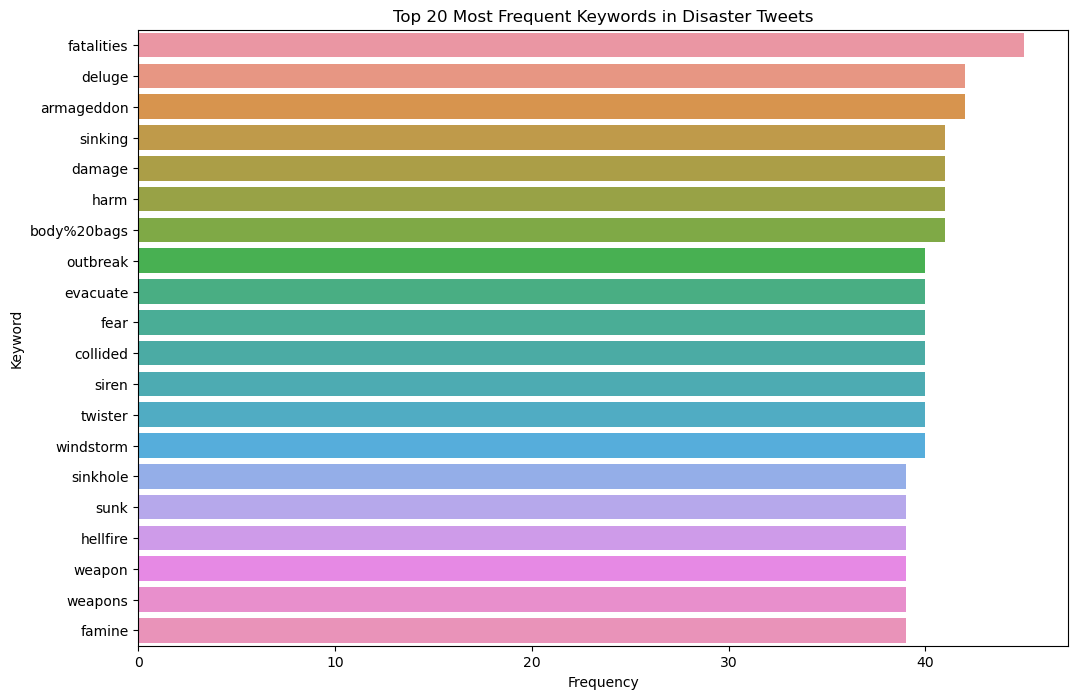

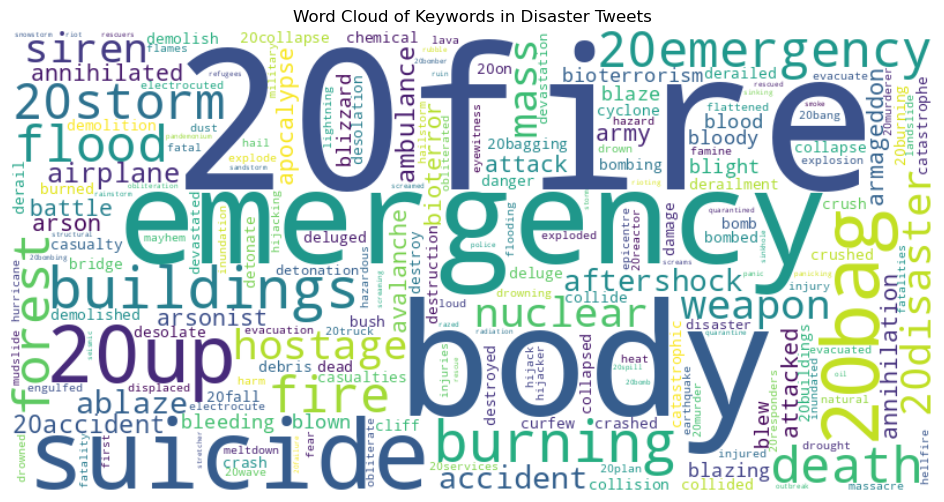

In [10]:
# Extract and preprocess the keyword column (assuming it's already cleaned)
keywords = train['keyword'].dropna().str.lower()

# Calculate the frequency of each keyword
keyword_counts = keywords.value_counts()

# Choose the top N keywords to visualize (you can adjust N as needed)
top_n_keywords = 20

# Create a bar chart to visualize the top N keywords
plt.figure(figsize=(12, 8))
sns.barplot(x=keyword_counts.head(top_n_keywords).values, y=keyword_counts.head(top_n_keywords).index)
plt.title(f'Top {top_n_keywords} Most Frequent Keywords in Disaster Tweets')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

# Create a word cloud to visualize all distinct keywords

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(keywords.unique()))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords in Disaster Tweets')
plt.show()







By visualizing the top 20 most commonly occurring keywords within disaster-related tweets allows us to establish which terms are indicative of a disaster scenario. Additionally, creating a word cloud encompassing all the keywords offers us valuable insights into the textual content we are analyzing. This dual approach enhances our understanding of the dataset, shedding light on the predominant language and themes associated with disaster-related tweets.

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h2 style="color: #317773;"><b>Data Preprocessing</b></h2>

In [19]:
train = train[['text', 'target']]
test = np.array(test['text'])

After this operation, the train DataFrame will contain only these two columns, which are crucial for the task at hand. 'text' represents the input data, such as text or features, and 'target' represents the corresponding labels or target variable that the model aims to predict. By keeping only these columns, unnecessary data is removed, and the DataFrame is streamlined for modeling.
Also test DataFrame is used to evaluate the performance of a trained machine learning model.

In summary, this code prepares the training and test data for a machine learning and NLP task by selecting and retaining only the relevant columns ('text' and 'target' in the training data) and converting the 'text' column of the test data into a NumPy array for further processing and modeling.

In [15]:
train_features = np.array(train['text'])
train_labels = np.array(train['target'])

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h3 style="color: #317773;"><b>Lowercasing</b></h3>

Lowercasing helps in normalizing the text data by converting all characters to the same case and ensures that words with the same spelling but different cases are treated as identical features. 

In [20]:
train_features = [sentence.lower() for sentence in train_features]
test = [sentence.lower() for sentence in test]

In [21]:
train_features[:5]

['our deeds are the reason of this #earthquake may allah forgive us all',
 'forest fire near la ronge sask. canada',
 "all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in california ',
 'just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school ']

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h3 style="color: #317773;"><b>Removing Special Characters</b></h3>

Removing special characters is essential in NLP and ML for text analysis because it enhances the quality and consistency of the textual data. Special characters such as punctuation marks, symbols, and non-alphanumeric characters do not usually carry semantic meaning in the context of many NLP tasks. By eliminating them, we reduce noise in the data and simplify the feature space, allowing models to focus on the meaningful linguistic content. 

In [26]:
# def remove_special_chars(text):
#     text_without_links = re.sub(r'http\S+', '', text)
#     text_without_special_chars = re.sub(r'[^a-zA-Z\s]', '', text_without_links)
    
#     return text_without_special_chars

def remove_special_chars(text, remove_urls=True, remove_digits=True):
    # Remove URLs if remove_urls is True
    if remove_urls:
        text = re.sub(r'http\S+', '', text)
    
    # Define the regular expression pattern based on the options
    if remove_digits:
        # Remove digits and special characters
        pattern = r'[^a-zA-Z\s]'
    else:
        # Remove special characters, but keep digits
        pattern = r'[^\w\s]'
    
    # Use the pattern to remove special characters
    text_without_special_chars = re.sub(pattern, '', text)
    
    return text_without_special_chars

In [27]:
train_features = [remove_special_chars(text) for text in train_features]
test = [remove_special_chars(text) for text in test]

In [28]:
train_features[:5]

['our deeds are the reason of this earthquake may allah forgive us all',
 'forest fire near la ronge sask canada',
 'all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected',
 ' people receive wildfires evacuation orders in california ',
 'just got sent this photo from ruby alaska as smoke from wildfires pours into a school ']

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h3 style="color: #317773;"><b>Stopwords Removal</b></h3>

Stopwords add noise to text data because they occur frequently but don't contribute significantly to the content's meaning. Removing them reduces noise and simplifies the data.

In [29]:
nltk.download('stopwords')

def remove_stopwords(sentence):
    stop_words = set(stopwords.words("english"))
    words = sentence.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_words)
    return filtered_sentence

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [30]:
train_features = [remove_stopwords(sentence) for sentence in train_features]
test = [remove_stopwords(sentence) for sentence in test]

In [31]:
train_features[:5]

['deeds reason earthquake may allah forgive us',
 'forest fire near la ronge sask canada',
 'residents asked shelter place notified officers evacuation shelter place orders expected',
 'people receive wildfires evacuation orders california',
 'got sent photo ruby alaska smoke wildfires pours school']

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h3 style="color: #317773;"><b>Lemmatization</b></h3>

 Lemmatization reduces inflected words to their base form, ensuring consistency in text data. For example, "running," "ran," and "runs" would all be lemmatized to "run," simplifying text representation.

In [32]:
lemmatizer = spacy.load("en_core_web_sm")

def lemmatize_sentence(sentence):
    doc = lemmatizer(sentence)
    lemmatized_sentence = " ".join([token.lemma_ for token in doc])
    return lemmatized_sentence

In [33]:
train_features = [lemmatize_sentence(sentence) for sentence in train_features]
test = [lemmatize_sentence(sentence) for sentence in test]

In [34]:
train_features[:5]

['deed reason earthquake may allah forgive we',
 'forest fire near la ronge sask canada',
 'resident ask shelter place notify officer evacuation shelter place order expect',
 'people receive wildfire evacuation order california',
 'got send photo ruby alaska smoke wildfire pour school']

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h3 style="color: #317773;"><b>Tokenization</b></h3>

Tokenization divides text into manageable units, making it easier for computers to process and understand natural language. Tokens serve as the building blocks for subsequent analysis.

In [35]:
# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<oov>')

# Fit the tokenizer on the lemmatized texts
tokenizer.fit_on_texts(train_features)

# Convert texts to sequences of tokens
train_sequences = tokenizer.texts_to_sequences(train_features)
test_sequences = tokenizer.texts_to_sequences(test)

The purpose of this code is to prepare text data for use in machine learning or deep learning models. By converting text to sequences of integers, it enables the model to work with numerical data, which is a prerequisite for most NLP tasks. The tokenizer ensures that both training and test data are processed consistently.

In [38]:
train_sequences[:5]

[[3677, 454, 217, 90, 1338, 1790, 44],
 [151, 6, 196, 533, 5428, 5429, 1161],
 [1463, 516, 1791, 380, 5430, 348, 219, 1791, 380, 455, 417],
 [16, 2391, 99, 219, 455, 53],
 [289, 220, 153, 5431, 1792, 236, 99, 2392, 142]]

In [36]:
max_sequence_length = 20
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

In [37]:
padded_train_sequences[:5]

array([[3677,  454,  217,   90, 1338, 1790,   44,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 151,    6,  196,  533, 5428, 5429, 1161,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1463,  516, 1791,  380, 5430,  348,  219, 1791,  380,  455,  417,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  16, 2391,   99,  219,  455,   53,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 289,  220,  153, 5431, 1792,  236,   99, 2392,  142,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h2 style="color: #317773;"><b>Split Training and Validation Data</b></h2>

In [39]:
X_train, X_val, y_train, y_val = train_test_split(padded_train_sequences, train_labels, test_size=0.2, random_state=0)

In [40]:
X_train.shape, y_train.shape

((6090, 20), (6090,))

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h2 style="color: #317773;"><b>Models architecture and training</b></h2>

In this step we will assess the performance of various machine learning and deep learning models, namely LSTM (Long Short-Term Memory), GRU (Gated Recurrent Unit), SVM (Support Vector Machine), Random Forest Classifier, and XGBoost Classifier, in the classification of tweets into two categories: real disasters and non-disasters. The goal is to determine which model exhibits the highest classification accuracy and effectiveness for this specific task.

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h3 style="color: #317773;"><b>Model 1: LSTM</b></h3>

In [41]:
# Hyperparameters
embedding_dim = 200
max_length = 20
vocab_size = 10000

In [42]:
# Model Architecture
lstm = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 200)           2000000   
                                                                 
 bidirectional (Bidirectiona  (None, 20, 128)          135680    
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 20, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 20, 128)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                        

In [43]:
lstm.fit(X_train, y_train,
         epochs=10,
         validation_data=(X_val, y_val),
         callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')]
         )

Epoch 1/10
191/191 [==============================] - 25s 81ms/step - loss: 0.7517 - accuracy: 0.6269 - val_loss: 0.6799 - val_accuracy: 0.5877
Epoch 2/10
191/191 [==============================] - 13s 70ms/step - loss: 0.4733 - accuracy: 0.7977 - val_loss: 0.4624 - val_accuracy: 0.7938
Epoch 3/10
191/191 [==============================] - 14s 71ms/step - loss: 0.3412 - accuracy: 0.8693 - val_loss: 0.4876 - val_accuracy: 0.8070
Epoch 4/10
191/191 [==============================] - 13s 70ms/step - loss: 0.2571 - accuracy: 0.9039 - val_loss: 0.6144 - val_accuracy: 0.7702
Epoch 5/10
191/191 [==============================] - 13s 69ms/step - loss: 0.2222 - accuracy: 0.9230 - val_loss: 0.6537 - val_accuracy: 0.7892
Epoch 6/10
191/191 [==============================] - 14s 71ms/step - loss: 0.1910 - accuracy: 0.9365 - val_loss: 0.6919 - val_accuracy: 0.7728
Epoch 7/10
191/191 [==============================] - 13s 69ms/step - loss: 0.1604 - accuracy: 0.9463 - val_loss: 0.7715 - val_accuracy:

 We can see that model stopped at epoch 7, because it employs early stopping with a patience of 5 to prevent overfitting and terminate training if the validation loss doesn't improve for a certain number of consecutive epochs.

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h3 style="color: #317773;"><b>Model 2: GRU</b></h3>

In [44]:
# Model Architecture
gru = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 200)           2000000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 20, 128)          102144    
 nal)                                                            
                                                                 
 batch_normalization_3 (Batc  (None, 20, 128)          512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 20, 128)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               31104     
 nal)                                                            
                                                      

In [46]:
gru.fit(X_train, y_train,
         epochs=10,
         validation_data=(X_val, y_val),
         callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')]
         )

Epoch 1/10
191/191 [==============================] - 22s 67ms/step - loss: 0.7959 - accuracy: 0.5984 - val_loss: 0.6091 - val_accuracy: 0.6507
Epoch 2/10
191/191 [==============================] - 11s 57ms/step - loss: 0.5065 - accuracy: 0.7732 - val_loss: 0.4769 - val_accuracy: 0.7840
Epoch 3/10
191/191 [==============================] - 11s 60ms/step - loss: 0.3626 - accuracy: 0.8563 - val_loss: 0.5367 - val_accuracy: 0.7728
Epoch 4/10
191/191 [==============================] - 11s 58ms/step - loss: 0.2827 - accuracy: 0.8969 - val_loss: 0.5891 - val_accuracy: 0.7853
Epoch 5/10
191/191 [==============================] - 11s 57ms/step - loss: 0.2323 - accuracy: 0.9223 - val_loss: 0.6208 - val_accuracy: 0.7919
Epoch 6/10
191/191 [==============================] - 11s 59ms/step - loss: 0.1989 - accuracy: 0.9358 - val_loss: 0.6785 - val_accuracy: 0.7840
Epoch 7/10
191/191 [==============================] - 11s 57ms/step - loss: 0.1813 - accuracy: 0.9392 - val_loss: 0.8101 - val_accuracy:

GRU stopped also at epoch 7, we will compare the results in the end.

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h3 style="color: #317773;"><b>Model 3: Support Vector Classifier</b></h3>

In [52]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h3 style="color: #317773;"><b>Model 4: Random Forest Classifier</b></h3>

In [53]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h3 style="color: #317773;"><b>Model 5: XGBClassifier</b></h3>

In [54]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h2 style="color: #317773;"><b>Models Evaluation</b></h2>

The evaluation process for all five machine learning and deep learning models—LSTM (Long Short-Term Memory), GRU (Gated Recurrent Unit), SVM (Support Vector Machine), Random Forest Classifier, and XGBoost Classifier—involves assessing their performance in classifying tweets into two categories: real disasters and non-disasters. To begin, each model is trained on a training dataset, and its hyperparameters are tuned for optimal performance. Subsequently, the models are evaluated using a separate validation dataset to gauge their ability to generalize to unseen data. Key evaluation metrics will be accuracy and cross-validation to obtain robust performance estimates. 

In [57]:
def evaluate(model):
    predictions = model.predict(X_val)
    if predictions.shape == (1523,):
        accuracy = accuracy_score(predictions, y_val)
    else:
        predictions = predictions.flatten()
        predictions = np.round(predictions).astype('int')
        accuracy = accuracy_score(predictions, y_val)
    return accuracy

In [58]:
model_1_acc = evaluate(lstm)
model_2_acc = evaluate(gru)
model_3_acc = evaluate(svc)
model_4_acc = evaluate(rfc)
model_5_acc = evaluate(xgbc)

48/48 [==============================] - 2s 10ms/step


In [59]:
accuracy_list = [model_1_acc, model_2_acc, model_3_acc, model_4_acc, model_5_acc]

In [60]:
for i in range(1, 6):
    print(f'Accuracy for model_{i}: {accuracy_list[i-1]}')

Accuracy for model_1: 0.7695338148391333
Accuracy for model_2: 0.7747866053841103
Accuracy for model_3: 0.5922521339461589
Accuracy for model_4: 0.6736703873933026
Accuracy for model_5: 0.685489166119501


In summary, Model_2 ,which is GRU, appears to be the most effective among the evaluated models in terms of accuracy, while Model_3 has the lowest accuracy, indicating room for improvement in its classification performance. 

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h2 style="color: #317773;"><b>Tuning parameters for LSTM and GRU and analyzing results</b></h2>

In [79]:
# Model Architecture
lstm_tuned = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create a custom Adam optimizer with the specified learning rate
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the custom optimizer
lstm_tuned.compile(loss='binary_crossentropy', optimizer=custom_optimizer, metrics=['accuracy'])
lstm_tuned.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 20, 200)           2000000   
                                                                 
 bidirectional_16 (Bidirecti  (None, 20, 128)          135680    
 onal)                                                           
                                                                 
 batch_normalization_24 (Bat  (None, 20, 128)          512       
 chNormalization)                                                
                                                                 
 dropout_24 (Dropout)        (None, 20, 128)           0         
                                                                 
 bidirectional_17 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                      

In [80]:
lstm_tuned.fit(X_train, y_train,
         epochs=10,
         validation_data=(X_val, y_val),
         callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')]
         )

Epoch 1/10
191/191 [==============================] - 23s 74ms/step - loss: 0.6415 - accuracy: 0.6854 - val_loss: 0.6152 - val_accuracy: 0.6126
Epoch 2/10
191/191 [==============================] - 12s 63ms/step - loss: 0.3649 - accuracy: 0.8506 - val_loss: 0.4776 - val_accuracy: 0.7912
Epoch 3/10
191/191 [==============================] - 12s 64ms/step - loss: 0.2589 - accuracy: 0.9028 - val_loss: 0.5365 - val_accuracy: 0.7859
Epoch 4/10
191/191 [==============================] - 12s 62ms/step - loss: 0.2055 - accuracy: 0.9233 - val_loss: 0.5674 - val_accuracy: 0.7919
Epoch 5/10
191/191 [==============================] - 12s 63ms/step - loss: 0.1601 - accuracy: 0.9456 - val_loss: 0.7178 - val_accuracy: 0.7800
Epoch 6/10
191/191 [==============================] - 12s 62ms/step - loss: 0.1362 - accuracy: 0.9524 - val_loss: 0.6844 - val_accuracy: 0.7866
Epoch 7/10
191/191 [==============================] - 12s 62ms/step - loss: 0.1248 - accuracy: 0.9547 - val_loss: 0.7733 - val_accuracy:

As we can see, our model already showed better performace in accuracy and val_accuracy comparing before tuning. 

In [75]:
# Model Architecture
gru_tuned = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0025)

gru_tuned.compile(loss='binary_crossentropy', optimizer=custom_optimizer, metrics=['accuracy'])

gru_tuned.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 20, 200)           2000000   
                                                                 
 bidirectional_12 (Bidirecti  (None, 20, 128)          102144    
 onal)                                                           
                                                                 
 batch_normalization_18 (Bat  (None, 20, 128)          512       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 20, 128)           0         
                                                                 
 bidirectional_13 (Bidirecti  (None, 64)               31104     
 onal)                                                           
                                                      

In [76]:
gru_tuned.fit(X_train, y_train,
         epochs=10,
         validation_data=(X_val, y_val),
         callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')]
         )

Epoch 1/10
191/191 [==============================] - 22s 66ms/step - loss: 0.7588 - accuracy: 0.6123 - val_loss: 0.5269 - val_accuracy: 0.7525
Epoch 2/10
191/191 [==============================] - 11s 58ms/step - loss: 0.4359 - accuracy: 0.8172 - val_loss: 0.4878 - val_accuracy: 0.7859
Epoch 3/10
191/191 [==============================] - 11s 58ms/step - loss: 0.3201 - accuracy: 0.8772 - val_loss: 0.6814 - val_accuracy: 0.7118
Epoch 4/10
191/191 [==============================] - 11s 60ms/step - loss: 0.2551 - accuracy: 0.9138 - val_loss: 0.6242 - val_accuracy: 0.7833
Epoch 5/10
191/191 [==============================] - 11s 58ms/step - loss: 0.2060 - accuracy: 0.9320 - val_loss: 0.7037 - val_accuracy: 0.7741
Epoch 6/10
191/191 [==============================] - 11s 57ms/step - loss: 0.1834 - accuracy: 0.9394 - val_loss: 0.7420 - val_accuracy: 0.7689
Epoch 7/10
191/191 [==============================] - 11s 59ms/step - loss: 0.1556 - accuracy: 0.9470 - val_loss: 0.7482 - val_accuracy:

In [82]:
lstm_tuned_acc = evaluate(lstm_tuned)
gru_tuned_acc = evaluate(gru_tuned)

48/48 [==============================] - 2s 10ms/step


In [83]:
print(f'Accuracy lstm_tuned_acc: {lstm_tuned_acc}')
print(f'Accuracy gru_tuned_acc: {gru_tuned_acc}')

Accuracy lstm_tuned_acc: 0.7806959947472094
Accuracy gru_tuned_acc: 0.7957977675640184


It's great to see that our tuned GRU model achieved a higher validation accuracy of 0.7958! This improvement indicates that my efforts in hyperparameter tuning and model optimization have paid off, and the model is now better at classifying tweets into disaster and non-disaster categories.

In [84]:
# Retrain the best model with all the data from test.csv
gru_tuned.fit(padded_train_sequences, train_labels,
         epochs=5,
         callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='loss')]
         )

Epoch 1/5
238/238 [==============================] - 13s 54ms/step - loss: 0.2595 - accuracy: 0.9126
Epoch 2/5
238/238 [==============================] - 13s 54ms/step - loss: 0.1907 - accuracy: 0.9351
Epoch 3/5
238/238 [==============================] - 13s 53ms/step - loss: 0.1547 - accuracy: 0.9486
Epoch 4/5
238/238 [==============================] - 13s 54ms/step - loss: 0.1443 - accuracy: 0.9507
Epoch 5/5
238/238 [==============================] - 13s 55ms/step - loss: 0.1380 - accuracy: 0.9503


In [85]:
test_predictions = gru_tuned.predict(padded_test_sequences)

102/102 [==============================] - 1s 10ms/step


In [87]:
test_predictions = test_predictions.flatten()
test_predictions = np.round(test_predictions).astype('int')

In [88]:
submission['target'] = test_predictions

In [89]:
submission.to_csv('submission.csv', index=False)

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h2 style="color: #317773;"><b>Conclusion</b></h2>

In the course of this project, we have embarked on a comprehensive data science journey focused on classifying tweets into two distinct categories: those related to disasters and those unrelated. The dataset, comprising 6,000 rows and featuring columns like text, keyword, location, and target, serves as the foundational cornerstone of our exploration.

Our primary project objective was to discern the most adept machine learning or deep learning model for this classification task. We delved into a meticulous data exploration phase, utilizing visualizations to gain insights, including class distribution analyses and keyword frequency assessments. Preprocessing steps played a pivotal role in readying the text data for modeling, encompassing techniques such as lowercasing, special character removal, stopwords elimination, and lemmatization.

The culmination of our efforts revealed a promising outcome: a meticulously tuned GRU (Gated Recurrent Unit) model that demonstrated a notable validation accuracy of 0.7958. However, this is merely one stage in the iterative process of data science. Our future endeavors will encompass further evaluations, such as testing on an unseen dataset, calculating an array of additional metrics, exploring model interpretability, and considering deployment strategies. This project underscores the dynamic nature of data science, where continual refinement and vigilance ensure the model's effectiveness and adaptability in real-world applications.

**What could be improved:**

Further we can exploring ensemble learning methods and data augmentation techniques can contribute to improved classification results. Ensembling multiple models can enhance predictive accuracy and robustness, while data augmentation can help address data scarcity issues. Addressing class imbalance, refining text preprocessing strategies, and continuous monitoring and retraining in a production environment are other facets that warrant attention. 

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">
    <h2 style="color: #317773;"><b>References</b></h2>
    

* Data for the project: https://www.kaggle.com/competitions/nlp-getting-started/data 
* Leaderboard: https://www.kaggle.com/competitions/nlp-getting-started/leaderboard